Домашнее задание. 

Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.
Чтобы решить задачи, обратите внимание на пункт “Принцип максимального правдоподобия” статьи http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf . Там находится ответ на вопрос “какая функция потерь”.

Как я понял, линейная классификация и есть по сути логистическая регрессия. 
В качестве loss-функции взял сигмоид, так как предложенную статью не осилил.
Не, серьезно, вот цитата из нее:

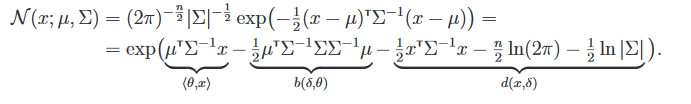

In [1]:
from IPython.display import Image
Image("citation.png")

In [2]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_classification
import pylab
from scipy import stats

In [3]:
# генерируем случайные данные
x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

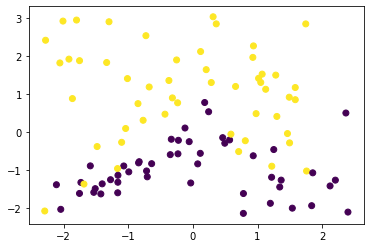

In [4]:
# посмотрим что получилось
pylab.scatter(x[:,0], x[:,1], c=y)
pylab.show()

In [5]:
# размер данных
m, n = np.shape(x)
m, n

(100, 2)

In [6]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -1.01302169,  1.40411149],
       [ 1.        , -0.67667517,  1.18364207],
       [ 1.        , -0.84064263, -0.80907811],
       [ 1.        ,  1.21814963, -1.18645814],
       [ 1.        , -1.33484216,  1.82596881]])

In [7]:
# y лист значений
y[:5]

array([1, 1, 0, 0, 1])

### Сначала вручную

In [8]:
# шаг алгоритма
alpha = 0.01

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [10]:
def gradient_descent_classification(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.array([0.5, 0.6, 0.7]) # ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        z = np.dot(x, theta) # матричное произведение
        
        hypothesis = sigmoid(z) 
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, (loss * hypothesis)) / m         
        
        theta = theta - alpha * gradient  # update
    
    return theta

In [11]:
%%time
theta = gradient_descent_classification(alpha, x, y, 1000)
theta

Wall time: 71 ms


array([0.38590446, 0.14543329, 1.37077073])

x1*w1 + x2*w2 + w0 = 0
x2 = -(x1*w1 + w0)/w2

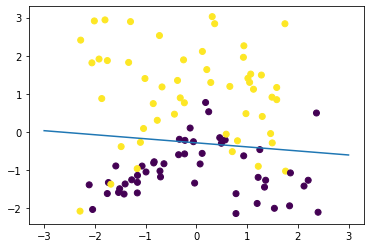

[0.03676428708569497, -0.599811703458838]

In [12]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(theta[0] + (theta[1]*x_point))/theta[2]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,1], x[:,2], c=y)
pylab.show()
y_points

### Используем готовые методы

In [13]:
from sklearn import linear_model

In [14]:
model = linear_model.SGDClassifier( alpha = 0.01, max_iter = 1000 )

In [15]:
x = x[:,1:]

In [16]:
%%time 

model.fit( x, y )

Wall time: 4 ms


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
model.intercept_, model.coef_

(array([0.00982844]), array([[0.02788669, 1.42010081]]))

In [18]:
y_predict_sgd = model.predict( x )

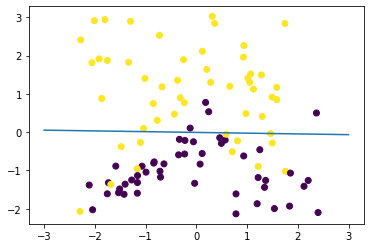

In [19]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(model.intercept_ + (model.coef_[0][0]*x_point))/model.coef_[0][1]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,0], x[:,1], c=y)
pylab.show()